In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
nlp= spacy.load("en_core_web_sm") 

In [4]:
df=pd.read_json('news_dataset.json')
df

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME
...,...,...
12690,Coach Shakes Hands Of Imaginary Players After ...,SPORTS
12691,This Minivan-Sized Sea Sponge Is Thought To Be...,SCIENCE
12692,RECAP: Dramatic Eclipse Photos Don't miss the ...,SCIENCE
12693,Richard Sherman Wants To Talk About Police Sho...,SPORTS


In [6]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [7]:
min_samples=1381

df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=42)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=42)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=42)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=42)

In [10]:
df_balanced=pd.concat([df_business,df_crime,df_science,df_sports],axis=0)

In [11]:
df_balanced

,text,category
594,How to Develop the Next Generation of Innovato...,BUSINESS
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS
...,...,...
424,'Floyd Did Not Fight Like The Man I Expected',SPORTS
3533,"18 Years Ago, This Pesky Kid Broke Baltimore O...",SPORTS
9813,Miami Heat's Dwyane Wade Pays Surprise Visit T...,SPORTS
3594,Even The Lions Outside The Art Institute Of Ch...,SPORTS


In [12]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

In [13]:
df_balanced.head(10)

,text,category,category_num
594,How to Develop the Next Generation of Innovato...,BUSINESS,0
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS,0
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS,0
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS,0
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS,0
12649,"AT&T Agrees To Buy Time Warner, In Principle T...",BUSINESS,0
3731,Anheuser-Busch Delivers A Bunch Of Beer In A S...,BUSINESS,0
1313,5 Habits of Leaders Who Create Change,BUSINESS,0
6961,What It Takes to Become a Billionaire You're d...,BUSINESS,0
351,"Fed Upgrades The Economy, But Will Be 'Patient...",BUSINESS,0


In [40]:
x_train,x_test,y_train,y_test=train_test_split(df_balanced.text,df_balanced.category_num,random_state=2023,test_size=0.2,stratify=df_balanced.category_num)

In [41]:
x_train.shape

(4419,)

In [42]:
model = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8796380090497737

In [43]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       276
           1       0.91      0.87      0.89       276
           2       0.90      0.92      0.91       276
           3       0.92      0.83      0.87       277

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [44]:
model1 = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])
model1.fit(x_train,y_train)
print(model1.score(x_test,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

0.8633484162895928
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       276
           1       0.91      0.87      0.89       276
           2       0.90      0.92      0.91       276
           3       0.92      0.83      0.87       277

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [46]:
model1 = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])
model1.fit(x_train,y_train)
print(model1.score(x_test,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

0.8552036199095022
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       276
           1       0.91      0.87      0.89       276
           2       0.90      0.92      0.91       276
           3       0.92      0.83      0.87       277

    accuracy                           0.88      1105
   macro avg       0.88      0.88      0.88      1105
weighted avg       0.88      0.88      0.88      1105



In [47]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [52]:
df_balanced['preprocessed_text']=df_balanced['text'].apply(preprocess)

In [53]:
df_balanced

,text,category,category_num,preprocessed_text
594,How to Develop the Next Generation of Innovato...,BUSINESS,0,develop Generation Innovators stop treat way g...
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS,0,Madoff Victims Payout near $ 7.2 billion Trust...
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS,0,Bay Area Floats Sanctuary Transit Policy prote...
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS,0,Microsoft agree acquire linkedin $ 26.2 billio...
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS,0,inside Legal Multibillion Dollar Weed Market
...,...,...,...,...
424,'Floyd Did Not Fight Like The Man I Expected',SPORTS,1,Floyd fight like Man expect
3533,"18 Years Ago, This Pesky Kid Broke Baltimore O...",SPORTS,1,18 year Ago Pesky Kid break Baltimore Orioles ...
9813,Miami Heat's Dwyane Wade Pays Surprise Visit T...,SPORTS,1,Miami Heat Dwyane Wade Pays Surprise Visit Par...
3594,Even The Lions Outside The Art Institute Of Ch...,SPORTS,1,Lions outside Art Institute Chicago Cubs Fever...


In [56]:
x_train, x_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_text, 
    df_balanced.category_num, 
    test_size=0.2, 
    random_state=42,
    stratify=df_balanced.category_num
)

In [57]:
model2 = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])
model2.fit(x_train,y_train)
print(model2.score(x_test,y_test))
y_pred = model2.predict(x_test)
print(classification_report(y_test, y_pred))

0.8868778280542986
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       276
           1       0.91      0.88      0.89       276
           2       0.89      0.94      0.91       277
           3       0.93      0.83      0.88       276

    accuracy                           0.89      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.89      0.89      0.89      1105



Text(95.72222222222221, 0.5, 'Truth')

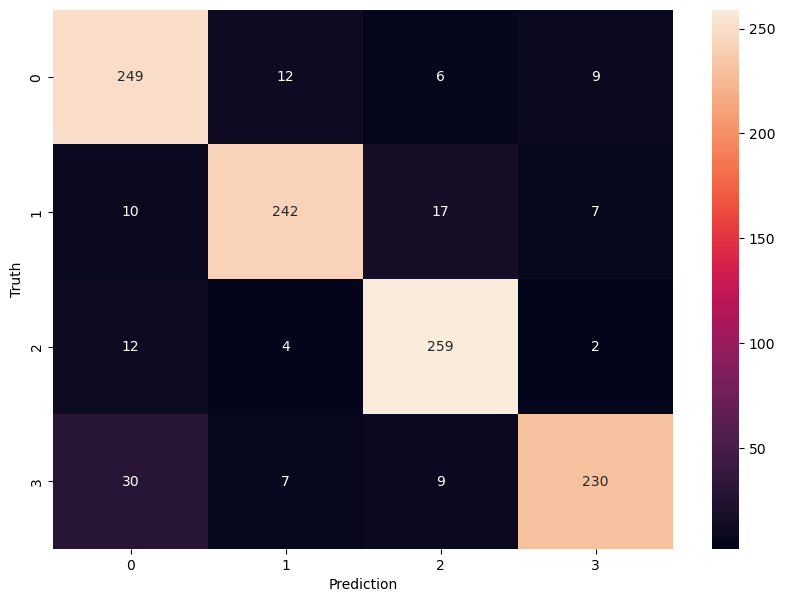

In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [70]:
df_balanced['category_num'][102]

0

In [67]:
model2.predict(email)

array([0, 1], dtype=int64)

In [66]:
email=['What Stephen Curry Can Teach Entrepreneurs Stephen Curry, like Google and Harvard, provide great examples on the significance of a wow-factor for budding entrepreneurs. As evidenced, a wow-factor enables a start-up to gain momentum and traction.'
,'The Olympics: More Relevant Now Than Ever Before I have been obsessed with the Olympics for as long as I can remember. When I was younger, it was simply another attempt at'
]